In [1]:
%matplotlib widget

In [2]:
%matplotlib inline

# Session 3

## X-ray source parameters ![gVXR](img/gvxr_logo.png)

## Authors: Ben Thorpe, Iwan Mitchel and Franck Vidal

(version 1.0, 22 Sep 2022)

# Aims of this session

- Create X-ray sources of different shapes:
    - Parallel beam (e.g. synchrotron);
    - Cone-beam (e.g. X-ray tube);
        - Ideal case, i.e. infinitesimal point source;
        - Focal spot, i.e. more realistic.
- Visualise the source shape;
- Set the beam spectrum:
    - Monochromatic;
    - Polychromatic:
        - By hand;
        - Using a text file;
        - Using [xpecgen](https://github.com/Dih5/xpecgen) (a python package to calculate x-ray spectra generated in tungsten anodes using the model of [Med. Phys. 43, 4655.](https://doi.org/10.1118/1.4955120)).

# Task 1: Initialise the simulation environment

At this stage, we should be able to set up the simulation environment.

1. Import the packages;
2. Create the OpenGL context with `gvxr.createWindow`;
3. Set the detector with `gvxr.setDetectorPosition`;
4. Set the detector up vector with `gvxr.setDetectorUpVector`;
5. Set the number of pixels with `gvxr.setDetectorNumberOfPixels`;
6. Set the pixel spacing with `gvxr.setDetectorPixelSize`;
7. Load the following samples.

---

## Step 1 of Task 1: Import the packages

We must import the Python packages as follows:

- `import matplotlib.pyplot as plt # Plotting`
- `from matplotlib.colors import LogNorm # Look up table`
- `from matplotlib.colors import PowerNorm # Look up table`
- `from gvxrPython3 import gvxr # Simulate X-ray images`
- `from gvxrPython3.utils import visualise # Visualise the 3D environment if k3D is supported`
- `from gvxrPython3.utils import plotScreenshot # Visualise the 3D environment using Matplotlib`

In [3]:
import matplotlib.pyplot as plt # Plotting
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table

from gvxrPython3 import gvxr
from gvxrPython3.utils import visualise
from gvxrPython3.utils import plotScreenshot



Speckpy is not install, you won't be able to load a beam spectrum using Speckpy
SimpleGVXR 2.0.2 (2022-10-05T09:09:48) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.2 (2022-10-05T09:09:48) [Compiler: GNU g++] on Linux


---

## Step 2 of Task 1: Create the OpenGL context

We may use `gvxr.createWindow`.

In [4]:
window_id = 0
visible = False
opengl_major_version = 4
opengl_minor_version = 5
backend = "EGL"
gvxr.createWindow(window_id, visible, backend, opengl_major_version, opengl_minor_version);

Wed Oct  5 21:54:48 2022 ---- Create window (ID: 0)
Wed Oct  5 21:54:48 2022 ---- Query the number of EGL devices
Wed Oct  5 21:54:48 2022 ---- Success
Wed Oct  5 21:54:48 2022 ---- Detected 3 EGL devices.
Wed Oct  5 21:54:48 2022 ---- Print the details here of every EGL device.
Wed Oct  5 21:54:48 2022 ---- Success
Wed Oct  5 21:54:48 2022 ---- Device 1/3:
Wed Oct  5 21:54:48 2022 ---- 	Device Extensions: EGL_NV_device_cuda EGL_EXT_device_drm EGL_EXT_device_drm_render_node EGL_EXT_device_persistent_id
Wed Oct  5 21:54:48 2022 ---- 	Device vendor: NVIDIA
Wed Oct  5 21:54:48 2022 ---- 	EGL DRM device file: /dev/dri/card0
Wed Oct  5 21:54:48 2022 ---- Device 2/3:
Wed Oct  5 21:54:48 2022 ---- 	Device Extensions: EGL_EXT_device_drm
Wed Oct  5 21:54:48 2022 ---- 	Failed to retrieve device vendor.
Wed Oct  5 21:54:48 2022 ---- 	EGL DRM device file: /dev/dri/card0
Wed Oct  5 21:54:48 2022 ---- Device 3/3:
Wed Oct  5 21:54:48 2022 ---- 	Device Extensions: EGL_MESA_device_software
Wed Oct  5 2

## Step 3 of Task 1: Set the detector position

We must use `gvxr.setDetectorPosition`. The detector position is x = 0.0 cm, y = 0.0 cm and z = -5.0 cm.

In [5]:
gvxr.setDetectorPosition(0, 0, -5, "cm")

--- 

## Step 4 of Task 1: Set the detector up vector

Call `gvxr.setDetectorUpVector(ix, jy, kz)` with `ix`, `jy`, `kz` defining a unit vector defines the 3D orientation of the 2D detector. 
In this example, `ix` = 0, `jy` = 1, and `kz` = 0.

In [6]:
gvxr.setDetectorUpVector(0, 1, 0)

--- 

## Step 5 of Task 1: Set the number of pixels

We want to create a detector with 600 pixels along both directions. 
For this purpose, we use `gvxr.setDetectorNumberOfPixels`.


In [7]:
gvxr.setDetectorNumberOfPixels(600, 600)

--- 

## Step 6 of Task 1: Set the pixel spacing

The space between the centre of two successive pixel is 0.35 mm along both directions. We must use `gvxr.setDetectorPixelSize`.

In [43]:
gvxr.setDetectorPixelSize(0.35, 0.35, "mm")

--- 

## Step 7 of Task 1: Load the samples and their material properties

The sample is made of 6 components, a matrix with spherical inserts of various material. 

| Label | fname | Material type | Material | Density |
|-------|-------|---------------|----------|---------|
| Matrix | `input_data/plate_sphere_inserts/phantoms/matrix.stl` | Element | C | N/A |
| Col_0 | `input_data/plate_sphere_inserts/phantoms/col_0.stl` | Element | Cu | N/A |
| Col_1 | `input_data/plate_sphere_inserts/phantoms/col_1.stl` | Element | Al | N/A |
| Col_2 | `input_data/plate_sphere_inserts/phantoms/col_2.stl` | Compound | SiC | 3.2 g/cm3 |
| Col_3 | `input_data/plate_sphere_inserts/phantoms/col_3.stl` | Mixture | Ti90Al6V4 | 4.42 g/cm3 |
| Col_4 | `input_data/plate_sphere_inserts/phantoms/col_4.stl` | Element | Fe | N/A |

Load all the corresponding STL files using `gvxr.loadMeshFile`. The vertex data in the STL files is stored in mm.
Depending on the type of material, we must use `gvxr.setElement`, `gvxr.setCompound`, `gvxr.setMixture`, and `gvxr.setDensity`.

In [44]:
gvxr.loadMeshFile("Matrix", "input_data/phantoms/plate_sphere_inserts/matrix.stl", "mm")
gvxr.loadMeshFile("Col_0", "input_data/phantoms/plate_sphere_inserts/col_0.stl", "mm")
gvxr.loadMeshFile("Col_1", "input_data/phantoms/plate_sphere_inserts/col_1.stl", "mm")
gvxr.loadMeshFile("Col_2", "input_data/phantoms/plate_sphere_inserts/col_2.stl", "mm")
gvxr.loadMeshFile("Col_3", "input_data/phantoms/plate_sphere_inserts/col_3.stl", "mm")
gvxr.loadMeshFile("Col_4", "input_data/phantoms/plate_sphere_inserts/col_4.stl", "mm")

gvxr.setElement("Matrix", "C");

gvxr.setElement("Col_0", "Cu")
gvxr.setElement("Col_1", "Al")

gvxr.setCompound("Col_2", "SiC");
gvxr.setDensity("Col_2",3.2, "g/cm3");

gvxr.setMixture("Col_3", "Ti90Al6V4");
gvxr.setDensity("Col_3", 4.42, "g/cm3");

gvxr.setElement("Col_4", "Fe")

Wed Oct  5 21:59:23 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/matrix.stl	nb_faces:	9702	nb_vertices:	29106	bounding_box (in cm):	(-3.5, -3.5, -0.75)	(3.5, 3.5, 0.75)
Wed Oct  5 21:59:23 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_0.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-2.99606, -2.19961, -0.496354)	(-2, 2.49901, 0.496354)
Wed Oct  5 21:59:23 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_1.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-1.74606, -2.19961, -0.496354)	(-0.75, 2.49901, 0.496354)
Wed Oct  5 21:59:23 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_2.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(-0.496057, -2.19961, -0.496354)	(0.5, 2.49901, 0.496354)
Wed Oct  5 21:59:23 2022 ---- file_name:	input_data/phantoms/plate_sphere_inserts/col_3.stl	nb_faces:	1938	nb_vertices:	5814	bounding_box (in cm):	(0.753943, -2.19961, -0.496354)	(1.75, 2.49901, 0.496

# Shape of the X-ray source

As of today, gVXR supports 3 different source shapes:

- Parallel beam;
- Cone-beam:
    - Ideal case, i.e. infinitesimal point source;
    - Focal spot, i.e. more realistic.

The parallel beam geometry corresponds to synchrotron sources. 
To create one, set the source position with `gvxr.setSourcePosition`, then call `gvxr.useParallelBeam()`.

The cone-beam geometry corresponds to X-ray tubes. There are two cases. The first one is an infinitesimal point source. 
To create one, set the source position with `gvxr.setSourcePosition`, then call `gvxr.usePointSource()`. The image is sharp. 

However, it is more realistic to consider the actual focal spot size of the X-ray tube ([click for more details](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/instrumentation.html#image-primitives). In reality, X-ray projections are blured. The blurring is due to i) the detector itself (the inherent unsharpnness) and we will see that in detail in the next Notebook, and ii) the non-punctuality of the source of radiation (geometric unsharpness). 

![geometric unsharpness](img/Unsharpness1.jpg)

To create one, set the source position with `gvxr.setSourcePosition`, then call `gvxr.setFocalSpot(px, py, pz, s, units, N)`.
`px`, `py`, and `pz` are three floating-point values used to set the size centre of the focal spot, and `s` the sie of the focal spot. `units` is a unit of length, e.g. `"um"`, `"mm"` or `"cm"`.
In practice, this type of source is implemented by repeating several point sources within the focal spot. Integrating all the correspoding projections creates the geometric unsharpness. `N` is the number of sub-sources for each axis. 

<div class="alert alert-block alert-warning">
    <b>Note:</b> For one X-ray projection using the focal spot size, N<sup>3</sup> simulations with point sources are performed and integrated. If N is high, the simulation runtime will increase.
</div>



Before we carry on, we make sure to zoom in in the 3D visualisation.

In [45]:
gvxr.setZoom(500)

---

### Task:

1. Set a monochromatic source. The photon energy is 100 keV. We use could `gvxr.setMonoChromatic(100,"keV",1)`;
2. Use a point source;
3. Set the source position to (0, 0, 20, "cm");
4. Compute an X-ray image and store it in a variable called `xray_image_point_source`;
5. Render the 3D visualisation with `gvxr.displayScene()`;
6. Take a screenshot with `gvxr.takeScreenshot()` and store it in a variable called `screenshot_point_source`.

In [46]:
gvxr.setMonoChromatic(100, "keV", 1)
gvxr.usePointSource()
gvxr.setSourcePosition(0, 0, 20, "cm")
xray_image_point_source = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_point_source = gvxr.takeScreenshot()

---

### Task:

1. Use a parallel source;
2. Compute an X-ray image and store it in a variable called `xray_image_parallel_source`;
3. Render the 3D visualisation with `gvxr.displayScene()`;
4. Take a screenshot with `gvxr.takeScreenshot()` and store it in a variable called `screenshot_parallel_source`.

In [47]:
gvxr.useParallelSource()
xray_image_parallel_source = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_parallel_source = gvxr.takeScreenshot()

---

### Task:

1. Use a cone-beam geometry with a focal spot of 0.5 cm along the 3 axes. Its position is (0, 0, 20, "cm"). Use $3 \times 3 \times 3$ sub-sources, i.e. `N` = 3;
2. Compute an X-ray image and store it in a variable called `xray_image_focal_spot`;
3. Render the 3D visualisation with `gvxr.displayScene()`;
4. Take a screenshot with `gvxr.takeScreenshot()` and store it in a variable called `screenshot_focal_spot`.

In [48]:
gvxr.setFocalSpot(0, 0, 20, 0.5, "cm", 3)
xray_image_focal_spot = gvxr.computeXRayImage()
gvxr.displayScene()
screenshot_focal_spot = gvxr.takeScreenshot()

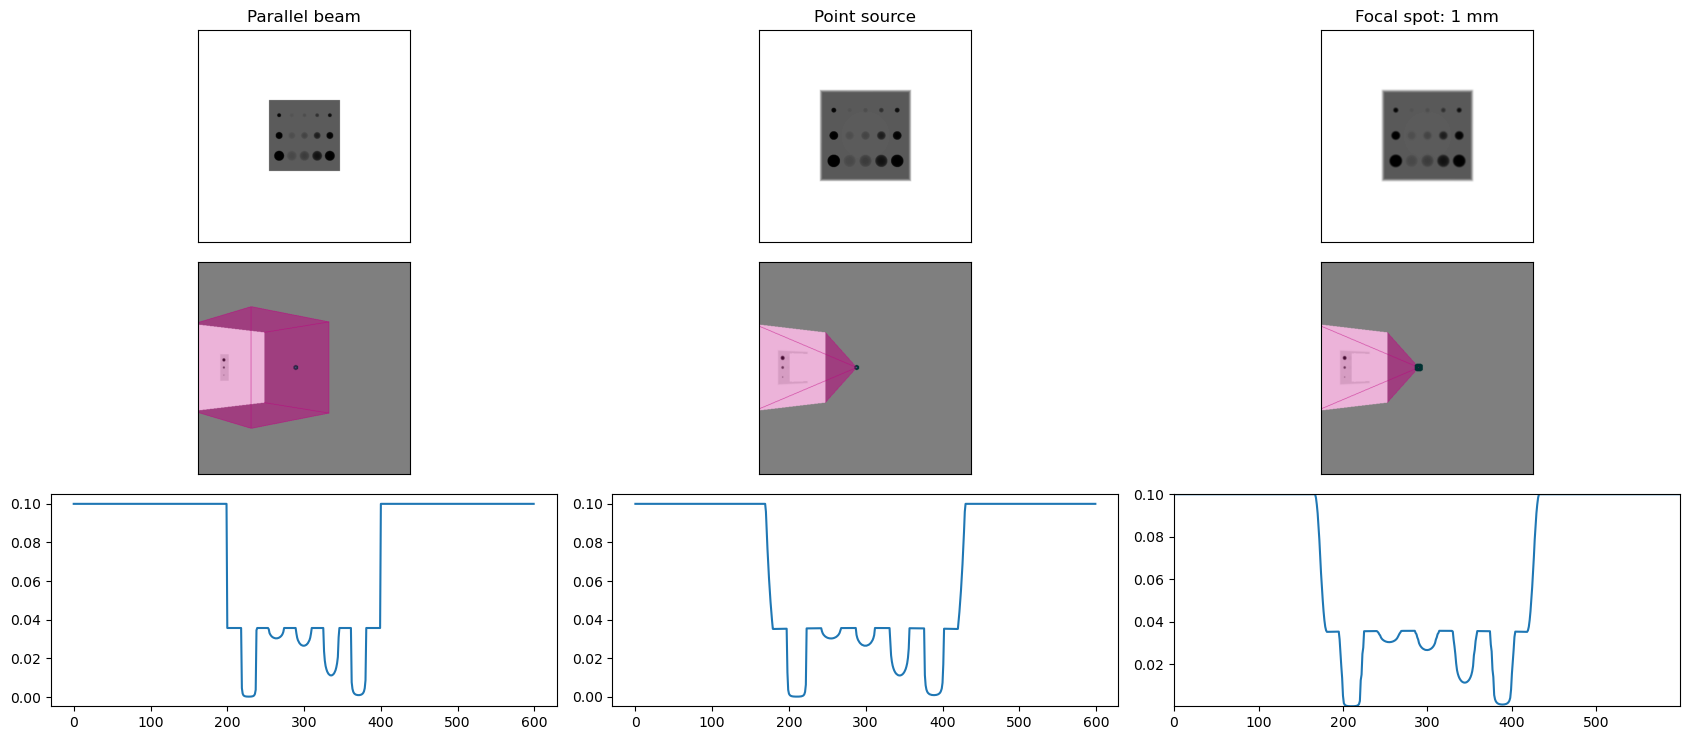

In [49]:
# plt.figure(figsize=(17, 7.5))

# plt.suptitle("Image simulated with different source shapes in gVirtualXray", y=0.75)
fig, axs = plt.subplots(3, 3, figsize=(17, 7.5))


axs[0, 0].imshow(xray_image_parallel_source, cmap="gray")
axs[0, 0].set_title("Parallel beam")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(xray_image_point_source, cmap="gray")
axs[0, 1].set_title("Point source")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[0, 2].imshow(xray_image_focal_spot, cmap="gray")
axs[0, 2].set_title("Focal spot: 1 mm")
axs[0, 2].set_xticks([])
axs[0, 2].set_yticks([])

axs[1, 0].imshow(screenshot_parallel_source)
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(screenshot_point_source)
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

axs[1, 2].imshow(screenshot_focal_spot)
axs[1, 2].set_xticks([])
axs[1, 2].set_yticks([])

axs[2, 0].plot(xray_image_parallel_source[300])
axs[2, 1].plot(xray_image_point_source[300])
axs[2, 2].plot(xray_image_focal_spot[300])

plt.tight_layout()
plt.margins(0,0)

# X-ray spectrum

The simulation software below makes it possible to calculate spectra as generated by the [X-ray generators](https://www.creatis.insa-lyon.fr/~letang/x-ray-book/instrumentation.html#x-ray-production) by specifying:
- the high voltage U of electrons acceleration,
- the thickness and the nature of the plate inserted.

Certain quantities associated with the spectra are calculated at output in particular
- the average energy of the photons of the spectrum,
- the half-value layer (in mm of Al).

In [14]:
%matplotlib inline
import ipywidgets as widgets
import utilities
widgets.interact_manual(utilities.spectrum,E0=widgets.IntText(value=100,step=1,description="High voltage (kV):",disabled=False,style={'description_width': 'initial'}),Mat_Z=widgets.Dropdown(options=[('Water',-1),('Aluminium',13),('Copper',29),('Lead',82)],value=-1,layout={'width': 'max-content'},description='Material:',style={'description_width': 'initial'}),Mat_X=widgets.FloatText(value=0.,step=0.01,description="Thickness (mm):",disabled=False,style={'description_width': 'initial'}));


interactive(children=(IntText(value=100, description='High voltage (kV):', style=DescriptionStyle(description_…